# Mass Layoffs Exploratory Data Analysis

Import python libraries and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
sns.set_theme(style="darkgrid")

In [2]:
data = pd.read_csv("layoffs_data.csv")

In [3]:
layoffs_data = pd.DataFrame(data)

## Layoffs Data Exploration

Layoffs Data

In [4]:
layoffs_data

,Company,Location,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,Bilibili,Shanghai,Media,0.30,2022-12-27,https://technode.com/2022/12/27/bilibili-repor...,3700.0,IPO,2022-12-30 15:59:06,China,NaN,Unknown
1,Octopus Network,Beau Vallon,Crypto,0.40,2022-12-27,https://heraldsheets.com/cold-crypto-winter-fo...,8.0,Series A,2022-12-30 16:00:19,Seychelles,NaN,Unknown
2,PayU,Amsterdam,Finance,0.06,2022-12-26,https://www.livemint.com/companies/news/payu-l...,NaN,Acquired,2022-12-26 23:29:37,Netherlands,150.0,Unknown
3,Back Market,Paris,Retail,0.13,2022-12-23,https://sifted.eu/articles/startup-tech-compan...,1000.0,Series E,2022-12-27 16:33:45,France,93.0,Unknown
4,Zoopla,London,Real Estate,NaN,2022-12-23,https://www.linkedin.com/posts/zoopla_its-with...,25.0,Series C,2022-12-30 23:25:30,United Kingdom,50.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1845,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,8.0,Unknown
1846,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,6.0,Unknown
1847,Tamara Mellon,Los Angeles,Retail,0.40,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,20.0,Unknown
1848,EasyPost,Salt Lake City,Logistics,NaN,2020-03-11,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,2020-03-31 13:21:54,United States,75.0,Unknown


In [5]:
layoffs_data.shape

(1850, 12)

Rows = 1850
Columns = 12

In [6]:
layoffs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     1850 non-null   object 
 1   Location                    1850 non-null   object 
 2   Industry                    1850 non-null   object 
 3   Percentage                  1247 non-null   float64
 4   Date                        1849 non-null   object 
 5   Source                      1850 non-null   object 
 6   Funds_Raised                1712 non-null   float64
 7   Stage                       1850 non-null   object 
 8   Date_Added                  1850 non-null   object 
 9   Country                     1850 non-null   object 
 10  Laid_Off_Count              1288 non-null   float64
 11  List_of_Employees_Laid_Off  1850 non-null   object 
dtypes: float64(3), object(9)
memory usage: 173.6+ KB


Observation of Null Values

<AxesSubplot: >

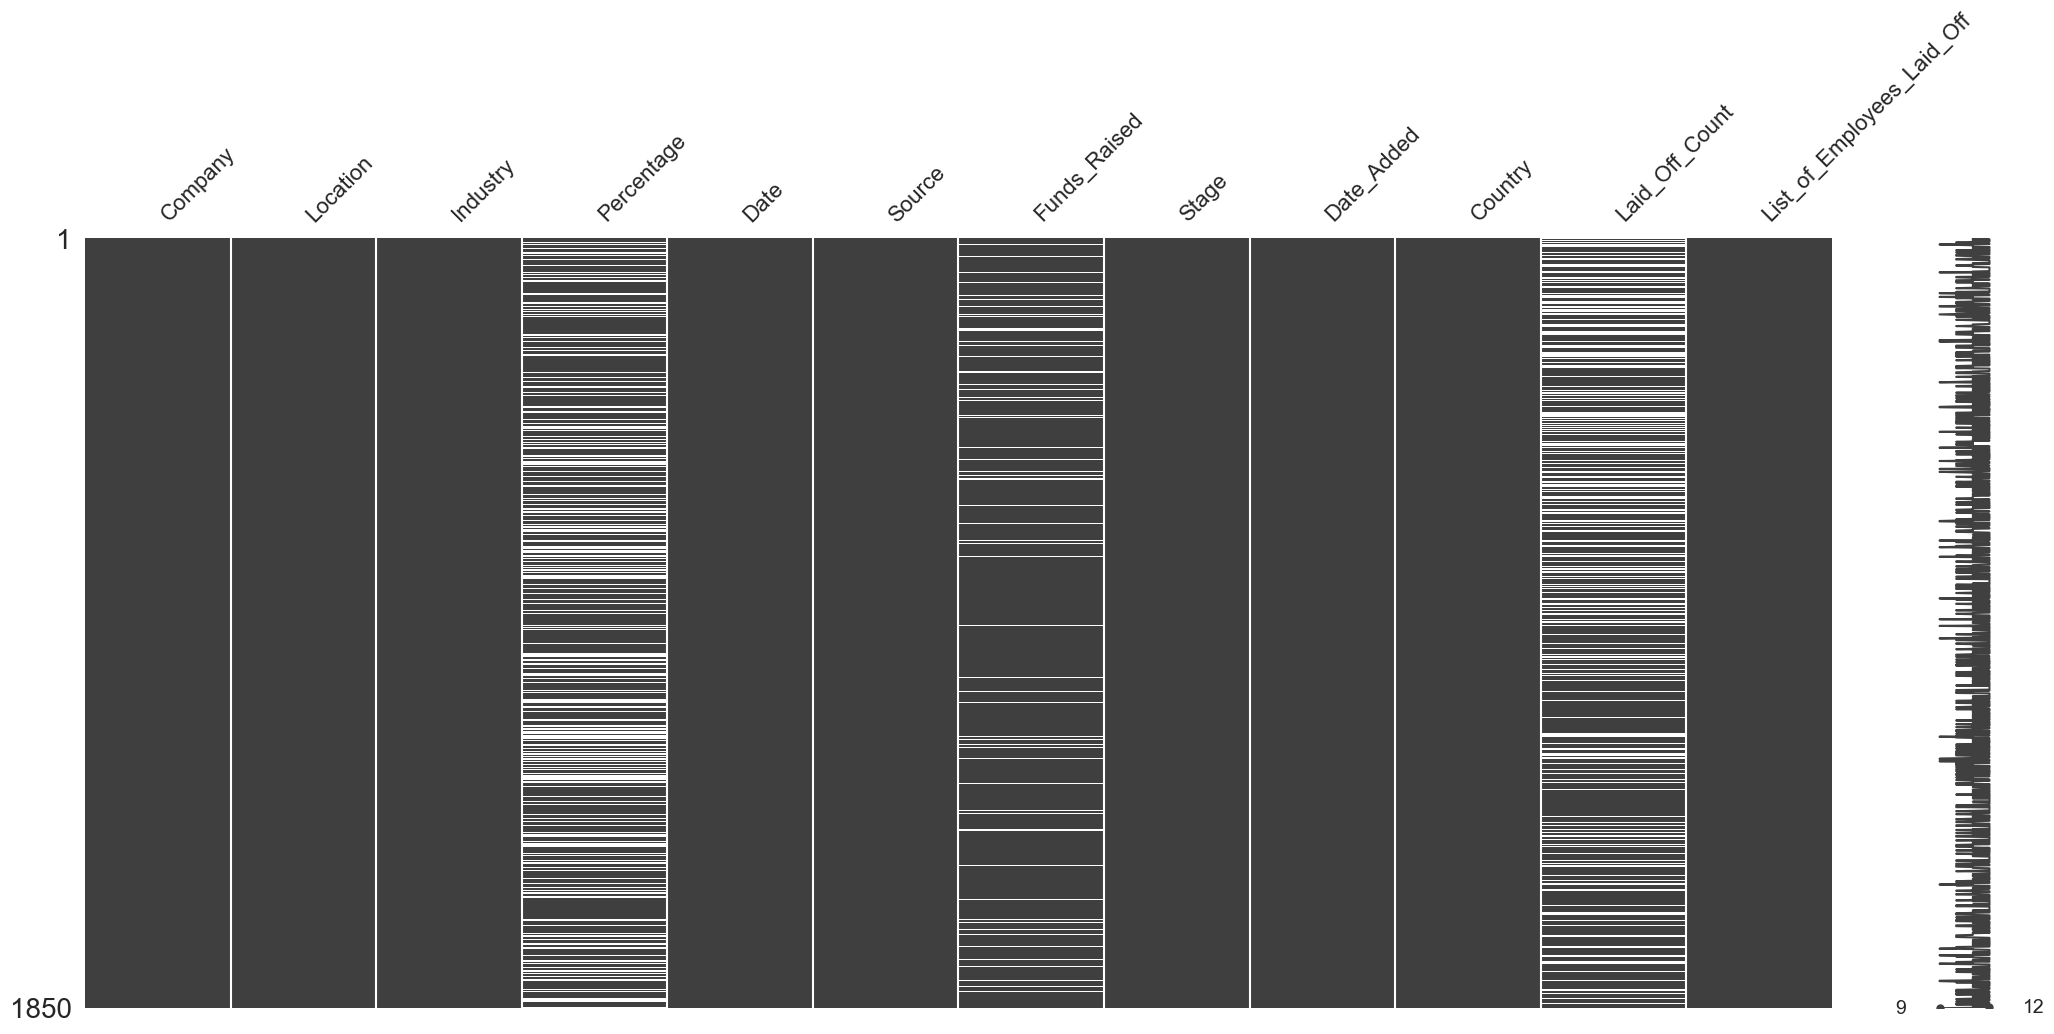

In [7]:
msn.matrix(layoffs_data)

<AxesSubplot: >

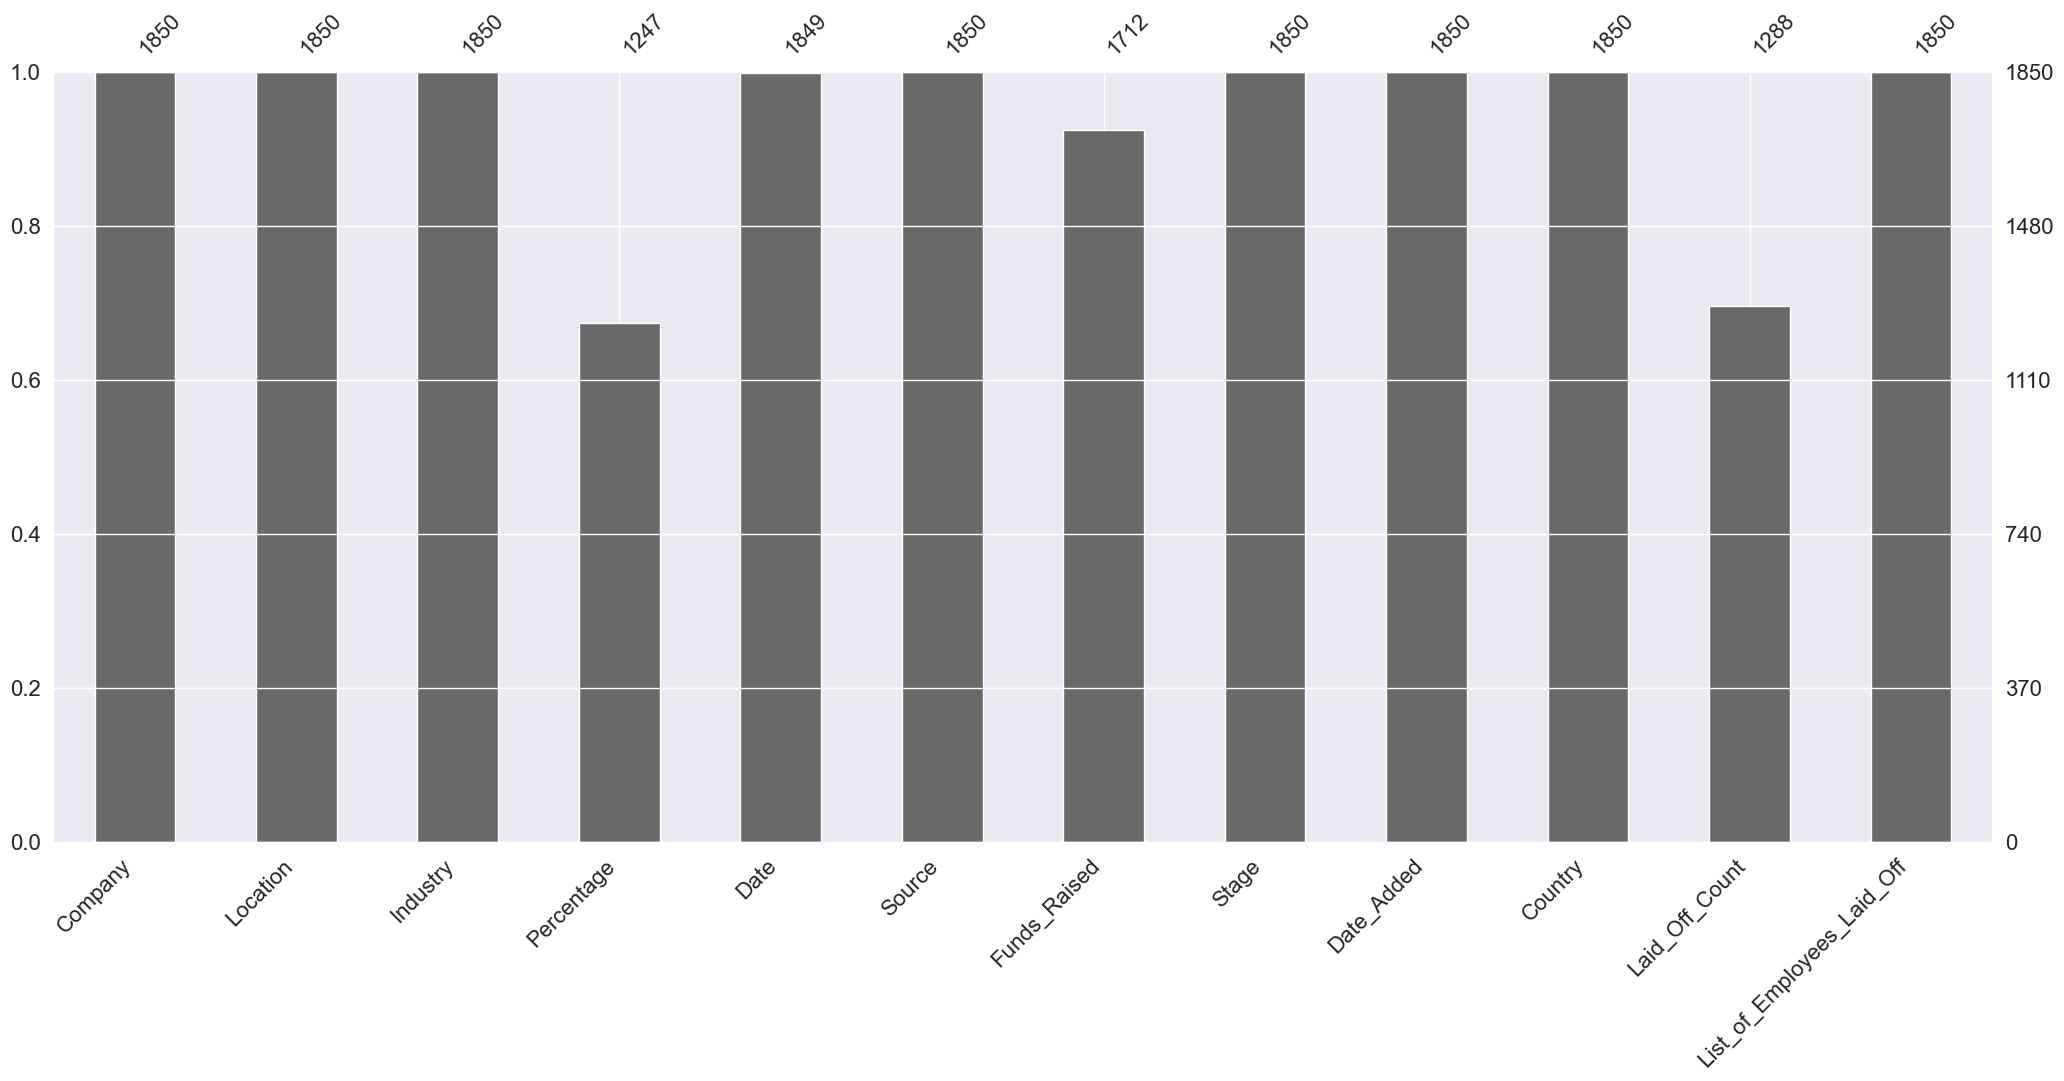

In [8]:
msn.bar(layoffs_data)

In [9]:
layoffs_data.isnull().sum()

Company                         0
Location                        0
Industry                        0
Percentage                    603
Date                            1
Source                          0
Funds_Raised                  138
Stage                           0
Date_Added                      0
Country                         0
Laid_Off_Count                562
List_of_Employees_Laid_Off      0
dtype: int64

Three columns (Percentage, Date, Funds_Raised, Laid_Off_Count) has null values

In [10]:
layoffs_data.head()

,Company,Location,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,Bilibili,Shanghai,Media,0.30,2022-12-27,https://technode.com/2022/12/27/bilibili-repor...,3700.0,IPO,2022-12-30 15:59:06,China,NaN,Unknown
1,Octopus Network,Beau Vallon,Crypto,0.40,2022-12-27,https://heraldsheets.com/cold-crypto-winter-fo...,8.0,Series A,2022-12-30 16:00:19,Seychelles,NaN,Unknown
2,PayU,Amsterdam,Finance,0.06,2022-12-26,https://www.livemint.com/companies/news/payu-l...,NaN,Acquired,2022-12-26 23:29:37,Netherlands,150.0,Unknown
3,Back Market,Paris,Retail,0.13,2022-12-23,https://sifted.eu/articles/startup-tech-compan...,1000.0,Series E,2022-12-27 16:33:45,France,93.0,Unknown
4,Zoopla,London,Real Estate,NaN,2022-12-23,https://www.linkedin.com/posts/zoopla_its-with...,25.0,Series C,2022-12-30 23:25:30,United Kingdom,50.0,Unknown


# #Data Cleaning

In [11]:
layoffs_data.drop(columns=['Source','Date_Added','List_of_Employees_Laid_Off'],inplace=True)

Dropped unwanted columns ( Source, Date_Added, List_of_Employees_Laid_Off )

In [12]:
layoffs_data

,Company,Location,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count
0,Bilibili,Shanghai,Media,0.30,2022-12-27,3700.0,IPO,China,NaN
1,Octopus Network,Beau Vallon,Crypto,0.40,2022-12-27,8.0,Series A,Seychelles,NaN
2,PayU,Amsterdam,Finance,0.06,2022-12-26,NaN,Acquired,Netherlands,150.0
3,Back Market,Paris,Retail,0.13,2022-12-23,1000.0,Series E,France,93.0
4,Zoopla,London,Real Estate,NaN,2022-12-23,25.0,Series C,United Kingdom,50.0
...,...,...,...,...,...,...,...,...,...
1845,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,45.0,Unknown,United States,8.0
1846,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,1.0,Seed,United States,6.0
1847,Tamara Mellon,Los Angeles,Retail,0.40,2020-03-12,90.0,Series C,United States,20.0
1848,EasyPost,Salt Lake City,Logistics,NaN,2020-03-11,12.0,Series A,United States,75.0


In [13]:
layoffs_data[layoffs_data['Laid_Off_Count'].isnull()]

,Company,Location,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count
0,Bilibili,Shanghai,Media,0.3,2022-12-27,3700.0,IPO,China,NaN
1,Octopus Network,Beau Vallon,Crypto,0.4,2022-12-27,8.0,Series A,Seychelles,NaN
6,Lendis,Berlin,Other,0.5,2022-12-21,90.0,Series A,Germany,NaN
9,Zhihu,Beijing,Consumer,0.1,2022-12-20,892.0,Series F,China,NaN
10,Health IQ,SF Bay Area,Healthcare,NaN,2022-12-19,136.0,Series D,United States,NaN
...,...,...,...,...,...,...,...,...,...
1838,Anyvision,Tel Aviv,Security,NaN,2020-03-19,74.0,Series A,Israel,NaN
1839,Popin,New York City,Fitness,1.0,2020-03-19,13.0,Unknown,United States,NaN
1840,Tuft & Needle,Phoenix,Retail,NaN,2020-03-19,0.0,Acquired,United States,NaN
1844,Service,Los Angeles,Travel,1.0,2020-03-16,5.1,Seed,United States,NaN


In [14]:
layoffs_data.drop(layoffs_data[layoffs_data['Percentage'].isnull() & 
                               layoffs_data['Laid_Off_Count'].isnull()].index,inplace=True)

Removed all rows if percentage and laid_of_count contains null values

In [15]:
layoffs_data

,Company,Location,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count
0,Bilibili,Shanghai,Media,0.30,2022-12-27,3700.0,IPO,China,NaN
1,Octopus Network,Beau Vallon,Crypto,0.40,2022-12-27,8.0,Series A,Seychelles,NaN
2,PayU,Amsterdam,Finance,0.06,2022-12-26,NaN,Acquired,Netherlands,150.0
3,Back Market,Paris,Retail,0.13,2022-12-23,1000.0,Series E,France,93.0
4,Zoopla,London,Real Estate,NaN,2022-12-23,25.0,Series C,United Kingdom,50.0
...,...,...,...,...,...,...,...,...,...
1844,Service,Los Angeles,Travel,1.00,2020-03-16,5.1,Seed,United States,NaN
1845,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,45.0,Unknown,United States,8.0
1846,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,1.0,Seed,United States,6.0
1847,Tamara Mellon,Los Angeles,Retail,0.40,2020-03-12,90.0,Series C,United States,20.0


In [16]:
layoffs_data.dropna(subset=['Laid_Off_Count'],inplace=True)

Removed all records if laid_off_count contains null values because our focus is more on this column

In [17]:
layoffs_data.reset_index(drop=True,inplace=True)
layoffs_data

,Company,Location,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count
0,PayU,Amsterdam,Finance,0.06,2022-12-26,NaN,Acquired,Netherlands,150.0
1,Back Market,Paris,Retail,0.13,2022-12-23,1000.0,Series E,France,93.0
2,Zoopla,London,Real Estate,NaN,2022-12-23,25.0,Series C,United Kingdom,50.0
3,TuSimple,San Diego,Transportation,0.25,2022-12-21,648.0,IPO,United States,350.0
4,Chope,Singapore,Food,0.24,2022-12-20,50.0,Series E,Singapore,65.0
...,...,...,...,...,...,...,...,...,...
1283,Help.com,Austin,Support,1.00,2020-03-16,6.0,Seed,United States,16.0
1284,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,45.0,Unknown,United States,8.0
1285,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,1.0,Seed,United States,6.0
1286,Tamara Mellon,Los Angeles,Retail,0.40,2020-03-12,90.0,Series C,United States,20.0


In [18]:
layoffs_data.isnull().sum()

Company             0
Location            0
Industry            0
Percentage        316
Date                0
Funds_Raised       81
Stage               0
Country             0
Laid_Off_Count      0
dtype: int64

In [19]:
layoffs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1288 non-null   object 
 1   Location        1288 non-null   object 
 2   Industry        1288 non-null   object 
 3   Percentage      972 non-null    float64
 4   Date            1288 non-null   object 
 5   Funds_Raised    1207 non-null   float64
 6   Stage           1288 non-null   object 
 7   Country         1288 non-null   object 
 8   Laid_Off_Count  1288 non-null   float64
dtypes: float64(3), object(6)
memory usage: 90.7+ KB


In [20]:
layoffs_data['Laid_Off_Count']=layoffs_data['Laid_Off_Count'].astype('int64')
layoffs_data['Date']=pd.to_datetime(layoffs_data['Date'])

1) Change the data type of laid_off_count column float to int
2) Change the data type of Date column object to datetime

In [21]:
layoffs_data

,Company,Location,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count
0,PayU,Amsterdam,Finance,0.06,2022-12-26,NaN,Acquired,Netherlands,150
1,Back Market,Paris,Retail,0.13,2022-12-23,1000.0,Series E,France,93
2,Zoopla,London,Real Estate,NaN,2022-12-23,25.0,Series C,United Kingdom,50
3,TuSimple,San Diego,Transportation,0.25,2022-12-21,648.0,IPO,United States,350
4,Chope,Singapore,Food,0.24,2022-12-20,50.0,Series E,Singapore,65
...,...,...,...,...,...,...,...,...,...
1283,Help.com,Austin,Support,1.00,2020-03-16,6.0,Seed,United States,16
1284,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,45.0,Unknown,United States,8
1285,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,1.0,Seed,United States,6
1286,Tamara Mellon,Los Angeles,Retail,0.40,2020-03-12,90.0,Series C,United States,20


Check for duplicates entries 

In [22]:
layoffs_data[layoffs_data.duplicated()]

,Company,Location,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count
643,Cazoo,London,Transportation,0.15,2022-06-07,2000.0,IPO,United Kingdom,750


In [23]:
layoffs_data[layoffs_data['Company']=='Cazoo']

,Company,Location,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count
642,Cazoo,London,Transportation,0.15,2022-06-07,2000.0,IPO,United Kingdom,750
643,Cazoo,London,Transportation,0.15,2022-06-07,2000.0,IPO,United Kingdom,750


In [24]:
layoffs_data.drop_duplicates(inplace=True)

Duplicated entries removed

In [25]:
layoffs_data

,Company,Location,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count
0,PayU,Amsterdam,Finance,0.06,2022-12-26,NaN,Acquired,Netherlands,150
1,Back Market,Paris,Retail,0.13,2022-12-23,1000.0,Series E,France,93
2,Zoopla,London,Real Estate,NaN,2022-12-23,25.0,Series C,United Kingdom,50
3,TuSimple,San Diego,Transportation,0.25,2022-12-21,648.0,IPO,United States,350
4,Chope,Singapore,Food,0.24,2022-12-20,50.0,Series E,Singapore,65
...,...,...,...,...,...,...,...,...,...
1283,Help.com,Austin,Support,1.00,2020-03-16,6.0,Seed,United States,16
1284,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,45.0,Unknown,United States,8
1285,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,1.0,Seed,United States,6
1286,Tamara Mellon,Los Angeles,Retail,0.40,2020-03-12,90.0,Series C,United States,20


# #Data Analysis

In [26]:
layoffs_data.describe()

,Percentage,Funds_Raised,Laid_Off_Count
count,971.000000,1206.000000,1287.000000
mean,0.238679,1031.879068,193.007770
std,0.219751,7307.269514,554.907543
min,0.000000,0.000000,3.000000
25%,0.100000,50.000000,32.000000
50%,0.180000,151.000000,70.000000
75%,0.300000,446.500000,150.000000
max,1.000000,121900.000000,11000.000000


In [27]:
layoffs_data.nunique()

Company           1090
Location           127
Industry            29
Percentage          70
Date               366
Funds_Raised       488
Stage               15
Country             42
Laid_Off_Count     238
dtype: int64

1). How many times a company has done layoffs.

In [28]:
#pd.set_option('display.max.rows',None)

In [29]:
layoffs_data['Company'].value_counts()

Uber             5
Loft             5
Latch            4
Swiggy           4
Patreon          4
                ..
Introhive        1
Zencity          1
Splice           1
Forma.ai         1
Tamara Mellon    1
Name: Company, Length: 1090, dtype: int64

 Uber and Loft has done 5 times layoffs.

In [30]:
layoffs_data[layoffs_data['Company']=='Uber']

,Company,Location,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count
309,Uber,Vilnius,Transportation,NaN,2022-09-07,24700.0,IPO,Lithuania,60
882,Uber,Amsterdam,Transportation,0.25,2020-06-12,24700.0,IPO,Netherlands,225
913,Uber,Bengaluru,Transportation,0.23,2020-05-26,24700.0,IPO,India,600
930,Uber,SF Bay Area,Transportation,0.13,2020-05-18,24700.0,IPO,United States,3000
964,Uber,SF Bay Area,Transportation,0.14,2020-05-06,24700.0,IPO,United States,3700


2). Location wise layoffs.

In [79]:
layoffs_data['Location'].value_counts()

SF Bay Area      336
New York City    140
Boston            58
Bengaluru         54
Los Angeles       51
                ... 
Shenzen            1
Durham             1
Louisville         1
Nashua             1
Charlotte          1
Name: Location, Length: 127, dtype: int64

In SF Bay Area , there is maximum times layoff has done.

3). Industry wise layoffs.

In [80]:
layoffs_data['Industry'].value_counts()

Finance           170
Retail            104
Healthcare         92
Transportation     86
Marketing          86
Food               80
Real Estate        69
Consumer           67
Education          57
Media              50
Other              44
Travel             43
Crypto             43
Security           39
Data               38
HR                 34
Sales              25
Logistics          24
Recruiting         23
Product            22
Infrastructure     20
Support            19
Fitness            19
Construction       11
Legal               7
Energy              6
Unknown             4
Aerospace           4
Hardware            1
Name: Industry, dtype: int64

In Finance industry maximum times layoff has done.

4). Country wise layoffs.

In [81]:
layoffs_data['Country'].value_counts()

United States           818
India                    99
Canada                   69
Brazil                   52
Germany                  42
United Kingdom           37
Israel                   35
Singapore                19
Australia                19
Sweden                   13
Indonesia                12
China                     6
Nigeria                   5
Netherlands               5
Argentina                 5
Denmark                   4
Kenya                     4
Estonia                   4
United Arab Emirates      4
Ireland                   3
Austria                   3
Hong Kong                 3
Mexico                    3
Portugal                  2
Norway                    2
Romania                   2
Malaysia                  2
Switzerland               1
Finland                   1
Bulgaria                  1
Seychelles                1
Russia                    1
Colombia                  1
Poland                    1
Senegal                   1
New Zealand         

In United States , there is maximum times layoff has done.

5). Stage wise layoffs.

In [82]:
layoffs_data['Stage'].value_counts()

Unknown           209
IPO               192
Series B          182
Series C          174
Series D          148
Series A           97
Acquired           85
Series E           74
Series F           36
Seed               30
Private Equity     21
Series H           18
Series G            9
Series I            6
Series J            6
Name: Stage, dtype: int64

In [83]:
layoffs_data

,Company,Location,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Month,Day
0,PayU,Amsterdam,Finance,0.06,2022-12-26,NaN,Acquired,Netherlands,150,2022,12,26
1,Back Market,Paris,Retail,0.13,2022-12-23,1000.0,Series E,France,93,2022,12,23
2,Zoopla,London,Real Estate,NaN,2022-12-23,25.0,Series C,United Kingdom,50,2022,12,23
3,TuSimple,San Diego,Transportation,0.25,2022-12-21,648.0,IPO,United States,350,2022,12,21
4,Chope,Singapore,Food,0.24,2022-12-20,50.0,Series E,Singapore,65,2022,12,20
...,...,...,...,...,...,...,...,...,...,...,...,...
1283,Help.com,Austin,Support,1.00,2020-03-16,6.0,Seed,United States,16,2020,3,16
1284,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,45.0,Unknown,United States,8,2020,3,13
1285,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,1.0,Seed,United States,6,2020,3,13
1286,Tamara Mellon,Los Angeles,Retail,0.40,2020-03-12,90.0,Series C,United States,20,2020,3,12


Total Laid off country wise

In [36]:
layoffs_data.groupby("Country")["Laid_Off_Count"].sum().sort_values(ascending=False)

Country
United States           163654
India                    31236
Brazil                    8110
Singapore                 5866
Canada                    5262
Netherlands               5220
China                     4430
Germany                   4375
United Kingdom            4170
Indonesia                 3161
Israel                    2938
Sweden                    2014
Australia                 1215
United Arab Emirates       995
Hong Kong                  730
Austria                    570
Nigeria                    491
Russia                     400
Kenya                      349
Argentina                  323
Senegal                    300
Mexico                     270
Estonia                    267
Finland                    250
Denmark                    240
Ireland                    230
Myanmar                    200
Romania                    140
Norway                     140
Bulgaria                   120
Portugal                   115
Malaysia                   100


In United States , there is maximum 163654 employee fired.

In [37]:
round(layoffs_data.groupby("Country")["Laid_Off_Count"].sum().sort_values(ascending=False)[0]/layoffs_data["Laid_Off_Count"].sum(),4)

0.6588

In [38]:
round(layoffs_data.groupby("Country")["Laid_Off_Count"].sum().sort_values(ascending=False)[1]/layoffs_data["Laid_Off_Count"].sum(),4)

0.1257

In United States, 65.88% laid off happened and In India, 12.57% laid of happened . It means almost 79% laid off happened 
in these two countries. And only 21% laid off happened in other countries.

Total Laid off company wise

In [39]:
layoffs_data.groupby("Company")["Laid_Off_Count"].sum().sort_values(ascending=False)

Company
Meta            11000
Amazon          10000
Uber             7585
Booking.com      4601
Cisco            4100
                ...  
Synergysuite        5
Flytedesk           4
TutorMundi          4
Spyce               4
Branch              3
Name: Laid_Off_Count, Length: 1090, dtype: int64

In [40]:
round(layoffs_data.groupby("Company")["Laid_Off_Count"].sum().sort_values(ascending=False)[0]/layoffs_data["Laid_Off_Count"].sum(),4)

0.0443

In [41]:
round(layoffs_data.groupby("Company")["Laid_Off_Count"].sum().sort_values(ascending=False)[1]/layoffs_data["Laid_Off_Count"].sum(),4)

0.0403

4.43% laid off by the Meta company and 4.03% laid off by the Amazon .

# #Data Visualization using Matplotlib Libraries.

Top 10  companies which laid off maximum times.

In [85]:
layoffs_data["Company"].value_counts()[0:10]

Uber       5
Loft       5
Latch      4
Swiggy     4
Patreon    4
OYO        4
WeWork     4
Shopify    4
Netflix    4
Vedantu    4
Name: Company, dtype: int64

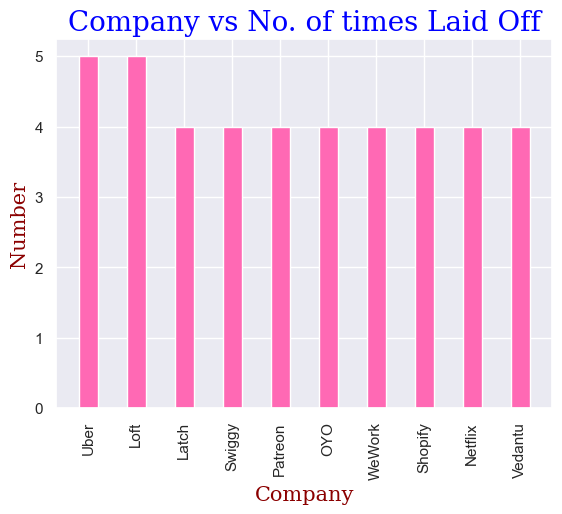

In [43]:
x = layoffs_data["Company"].value_counts()[0:10].index
y = layoffs_data["Company"].value_counts()[0:10].values

plt.xticks(rotation='vertical')

plt.bar(x,y,color="hotpink",width=0.4)

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Company vs No. of times Laid Off", fontdict = font1)
plt.xlabel("Company", fontdict = font2)
plt.ylabel("Number", fontdict = font2)
plt.show()

Top 10 locations from maximum times laid off happend.

In [44]:
layoffs_data["Location"].value_counts()[0:10]

SF Bay Area      336
New York City    140
Boston            58
Bengaluru         54
Los Angeles       51
Sao Paulo         42
Toronto           41
Seattle           39
London            38
Berlin            36
Name: Location, dtype: int64

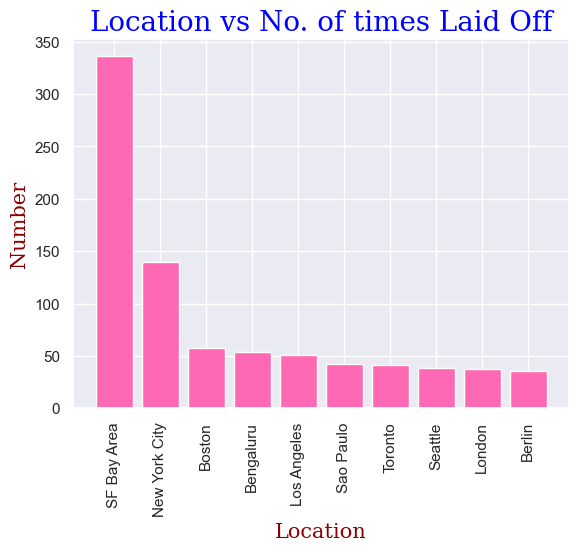

In [45]:
x = layoffs_data["Location"].value_counts()[0:10].index
y = layoffs_data["Location"].value_counts()[0:10].values

plt.bar(x,y, color="hotpink")
plt.xticks(rotation='vertical')
plt.title("Location vs No. of times Laid Off", fontdict = font1)
plt.xlabel("Location", fontdict = font2)
plt.ylabel("Number", fontdict = font2)
plt.show()

Top 10 Industry in which maximum times laid off happend

In [46]:
layoffs_data["Industry"].value_counts()[0:10]

Finance           170
Retail            104
Healthcare         92
Transportation     86
Marketing          86
Food               80
Real Estate        69
Consumer           67
Education          57
Media              50
Name: Industry, dtype: int64

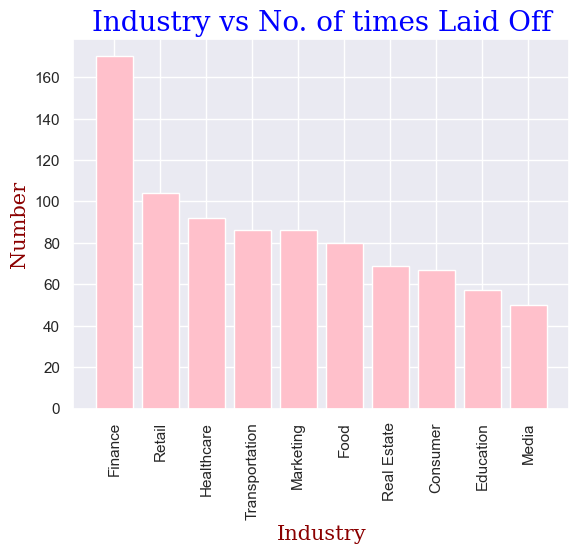

In [47]:
x =  layoffs_data["Industry"].value_counts()[0:10].index
y = layoffs_data["Industry"].value_counts()[0:10].values

plt.bar(x,y,color="pink")
plt.xticks(rotation='vertical')
plt.title("Industry vs No. of times Laid Off", fontdict = font1)
plt.xlabel("Industry", fontdict = font2)
plt.ylabel("Number", fontdict = font2)
plt.show()

Top 10 stage in which maximum laid off happened

In [86]:
layoffs_data["Stage"].value_counts()[1:11]

IPO               192
Series B          182
Series C          174
Series D          148
Series A           97
Acquired           85
Series E           74
Series F           36
Seed               30
Private Equity     21
Name: Stage, dtype: int64

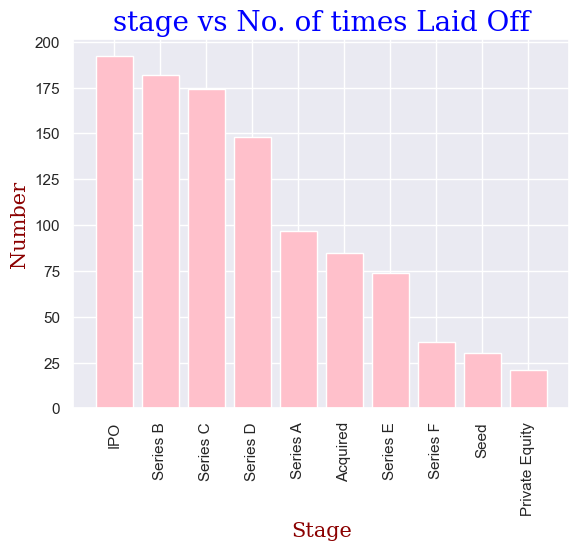

In [49]:
x=layoffs_data["Stage"].value_counts()[1:11].index
y=layoffs_data["Stage"].value_counts()[1:11].values

plt.bar(x,y,color="pink")
plt.xticks(rotation='vertical')
plt.title("stage vs No. of times Laid Off", fontdict = font1)
plt.xlabel("Stage", fontdict = font2)
plt.ylabel("Number", fontdict = font2)
plt.show()

Top 10 countries in which maximum times laid off happened.

In [87]:
layoffs_data["Country"].value_counts()[0:10]

United States     818
India              99
Canada             69
Brazil             52
Germany            42
United Kingdom     37
Israel             35
Singapore          19
Australia          19
Sweden             13
Name: Country, dtype: int64

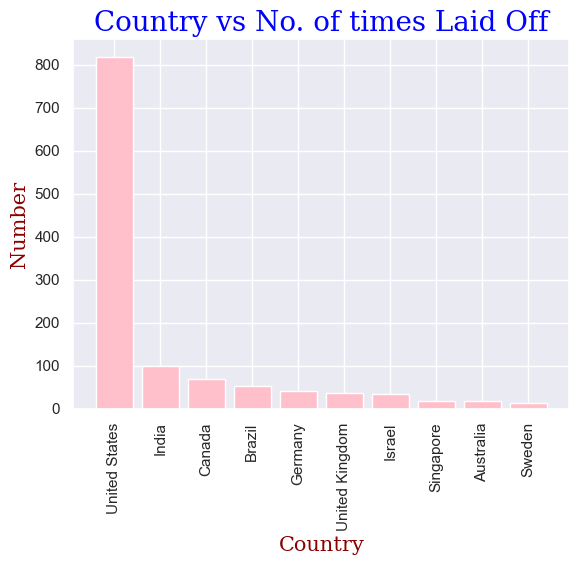

In [51]:
x=layoffs_data["Country"].value_counts()[0:10].index
y=layoffs_data["Country"].value_counts()[0:10].values

plt.bar(x,y,color="pink")
plt.xticks(rotation='vertical')
plt.title("Country vs No. of times Laid Off", fontdict = font1)
plt.xlabel("Country", fontdict = font2)
plt.ylabel("Number", fontdict = font2)
plt.show()

Top 10 Companies which laid off maximum.

In [52]:
layoffs_data.groupby("Company")["Laid_Off_Count"].sum().sort_values(ascending=False)[0:10]

Company
Meta           11000
Amazon         10000
Uber            7585
Booking.com     4601
Cisco           4100
Peloton         4084
Carvana         4000
Better.com      3900
Bytedance       3750
Twitter         3700
Name: Laid_Off_Count, dtype: int64

Text(0, 0.5, 'Number')

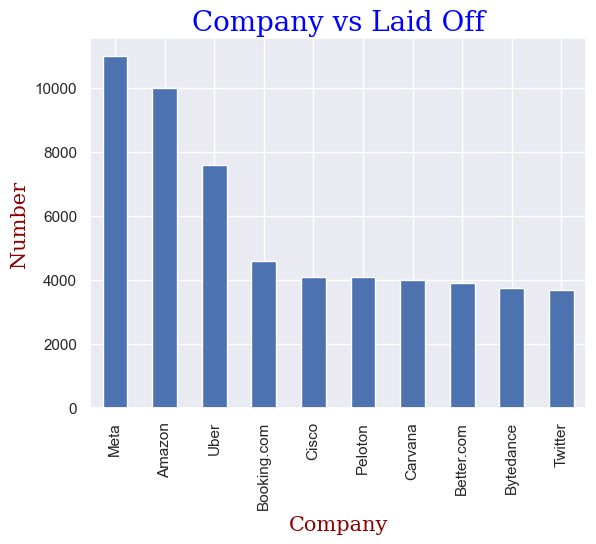

In [53]:
comp = layoffs_data.groupby("Company")["Laid_Off_Count"].sum().sort_values(ascending=False)[0:10]
comp.plot(kind="bar")
plt.title("Company vs Laid Off", fontdict = font1)
plt.xlabel("Company", fontdict = font2)
plt.ylabel("Number", fontdict = font2)

Top 10 location from maximum laid off happened.

In [54]:
layoffs_data.groupby("Location")["Laid_Off_Count"].sum().sort_values(ascending=False)[0:10]

Location
SF Bay Area      81036
New York City    22043
Bengaluru        17700
Seattle          16051
Boston            7430
Sao Paulo         6910
Los Angeles       5974
Singapore         5926
Mumbai            5525
Gurugram          5351
Name: Laid_Off_Count, dtype: int64

Text(0, 0.5, 'Number')

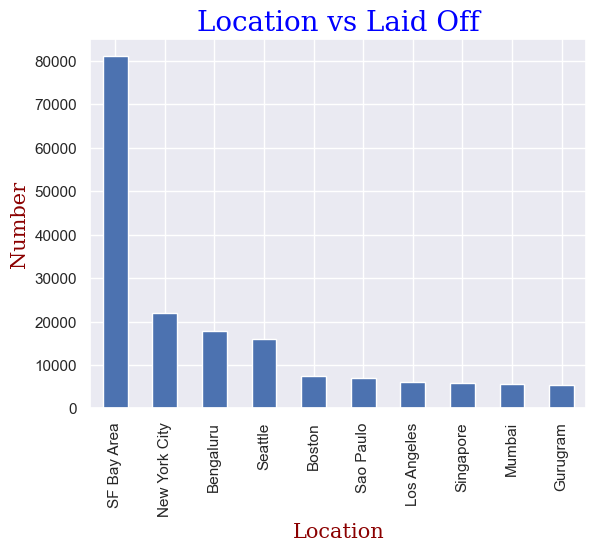

In [55]:
loca = layoffs_data.groupby("Location")["Laid_Off_Count"].sum().sort_values(ascending=False)[0:10]
loca.plot(kind="bar")
plt.title("Location vs Laid Off", fontdict = font1)
plt.xlabel("Location", fontdict = font2)
plt.ylabel("Number", fontdict = font2)

Top 10 Industry in which maximum laid off happened

In [56]:
layoffs_data.groupby("Industry")["Laid_Off_Count"].sum().sort_values(ascending=False)[0:10]

Industry
Consumer          29449
Transportation    29247
Retail            28074
Finance           21273
Food              20090
Real Estate       16414
Travel            15476
Healthcare        12243
Education         11286
Fitness            8688
Name: Laid_Off_Count, dtype: int64

Text(0, 0.5, 'Number')

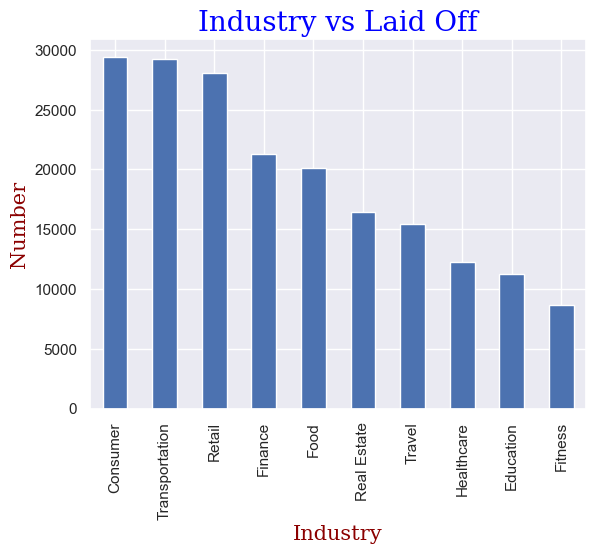

In [57]:
ind = layoffs_data.groupby("Industry")["Laid_Off_Count"].sum().sort_values(ascending=False)[0:10]
ind.plot(kind="bar")
plt.title("Industry vs Laid Off", fontdict = font1)
plt.xlabel("Industry", fontdict = font2)
plt.ylabel("Number", fontdict = font2)

Top 10 Stage in which maximum laid off happened.

In [58]:
layoffs_data.groupby("Stage")["Laid_Off_Count"].sum().sort_values(ascending=False)[0:10]

Stage
IPO               98266
Unknown           35440
Acquired          19728
Series D          17254
Series C          16771
Series B          13142
Series E          10276
Series F           8836
Series H           6389
Private Equity     6276
Name: Laid_Off_Count, dtype: int64

Text(0, 0.5, 'Number')

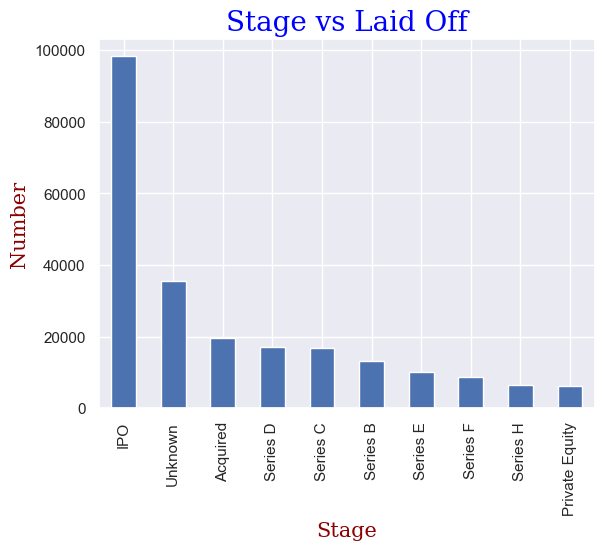

In [59]:
stage = layoffs_data.groupby("Stage")["Laid_Off_Count"].sum().sort_values(ascending=False)[0:10]
stage.plot(kind="bar")
plt.title("Stage vs Laid Off", fontdict = font1)
plt.xlabel("Stage", fontdict = font2)
plt.ylabel("Number", fontdict = font2)

Top 10 Countries in which maximum laid off happened

In [60]:
layoffs_data.groupby("Country")["Laid_Off_Count"].sum().sort_values(ascending=False)[0:10]

Country
United States     163654
India              31236
Brazil              8110
Singapore           5866
Canada              5262
Netherlands         5220
China               4430
Germany             4375
United Kingdom      4170
Indonesia           3161
Name: Laid_Off_Count, dtype: int64

Text(0, 0.5, 'Number')

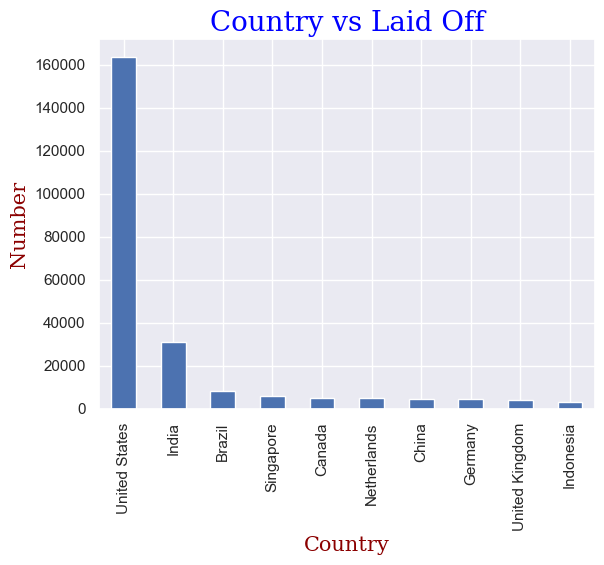

In [61]:
country = layoffs_data.groupby("Country")["Laid_Off_Count"].sum().sort_values(ascending=False)[0:10]
country.plot(kind="bar")
plt.title("Country vs Laid Off", fontdict = font1)
plt.xlabel("Country", fontdict = font2)
plt.ylabel("Number", fontdict = font2)

Year wise laid off

In [62]:
layoffs_data["Year"] = layoffs_data["Date"].dt.year
layoffs_data["Month"] = layoffs_data["Date"].dt.month
layoffs_data["Day"] = layoffs_data["Date"].dt.day

In [88]:
layoffs_data

,Company,Location,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Month,Day
0,PayU,Amsterdam,Finance,0.06,2022-12-26,NaN,Acquired,Netherlands,150,2022,12,26
1,Back Market,Paris,Retail,0.13,2022-12-23,1000.0,Series E,France,93,2022,12,23
2,Zoopla,London,Real Estate,NaN,2022-12-23,25.0,Series C,United Kingdom,50,2022,12,23
3,TuSimple,San Diego,Transportation,0.25,2022-12-21,648.0,IPO,United States,350,2022,12,21
4,Chope,Singapore,Food,0.24,2022-12-20,50.0,Series E,Singapore,65,2022,12,20
...,...,...,...,...,...,...,...,...,...,...,...,...
1283,Help.com,Austin,Support,1.00,2020-03-16,6.0,Seed,United States,16,2020,3,16
1284,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,45.0,Unknown,United States,8,2020,3,13
1285,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,1.0,Seed,United States,6,2020,3,13
1286,Tamara Mellon,Los Angeles,Retail,0.40,2020-03-12,90.0,Series C,United States,20,2020,3,12


In [64]:
year = layoffs_data.groupby("Year")["Laid_Off_Count"].sum()
year

Year
2020     80968
2021     15023
2022    152410
Name: Laid_Off_Count, dtype: int64

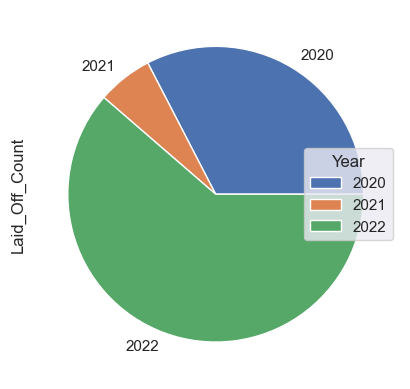

In [65]:
year.plot(kind='pie')
plt.legend(title="Year",loc="right")
plt.show()

Month wise layoff in each year.

In [66]:
year2020 = layoffs_data.query("Year==2020")
df1=year2020.groupby("Month")["Laid_Off_Count"].sum().to_frame()
df1.rename(columns={'Laid_Off_Count':'layoff_2020'},inplace=True)
df1

,layoff_2020
Month,
3,9628
4,26710
5,25804
6,7627
7,7112
8,1969
9,609
10,450
11,207


In [67]:
year2021 = layoffs_data.query("Year==2021")
df2=year2021.groupby("Month")["Laid_Off_Count"].sum().to_frame()
df2.rename(columns={'Laid_Off_Count':'layoff_2021'},inplace=True)
df2

,layoff_2021
Month,
1,6013
2,868
3,47
4,261
6,2434
7,80
8,1867
9,161
10,22


In [68]:
year2022 = layoffs_data.query("Year==2022")
df3 = year2022.groupby("Month")["Laid_Off_Count"].sum().to_frame()
df3.rename(columns={'Laid_Off_Count':'layoff_2022'},inplace=True)
df3

,layoff_2022
Month,
1,510
2,3625
3,5694
4,4064
5,12535
6,16834
7,16223
8,13095
9,5881


In [69]:
year = pd.concat([df3,df2,df1],axis=1)
year

,layoff_2022,layoff_2021,layoff_2020
Month,,,
1,510,6013.0,NaN
2,3625,868.0,NaN
3,5694,47.0,9628.0
4,4064,261.0,26710.0
5,12535,NaN,25804.0
6,16834,2434.0,7627.0
7,16223,80.0,7112.0
8,13095,1867.0,1969.0
9,5881,161.0,609.0


Month wise layoffs in each year using Matplotlib barh chart

Text(0, 0.5, 'Laid off')

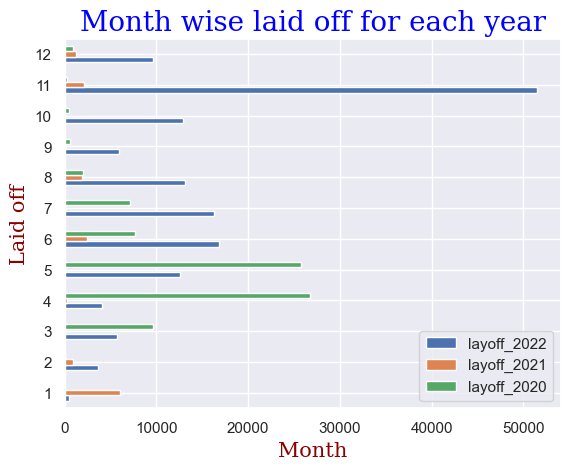

In [70]:
year.plot(kind="barh")
plt.title("Month wise laid off for each year", fontdict = font1)
plt.xlabel("Month", fontdict = font2)
plt.ylabel("Laid off", fontdict = font2)

# Statistical analysis using Seaborn Libraries.

Month wise layoffs in each year using Seaborn line chart

Text(58.18831250000002, 0.5, 'Month')

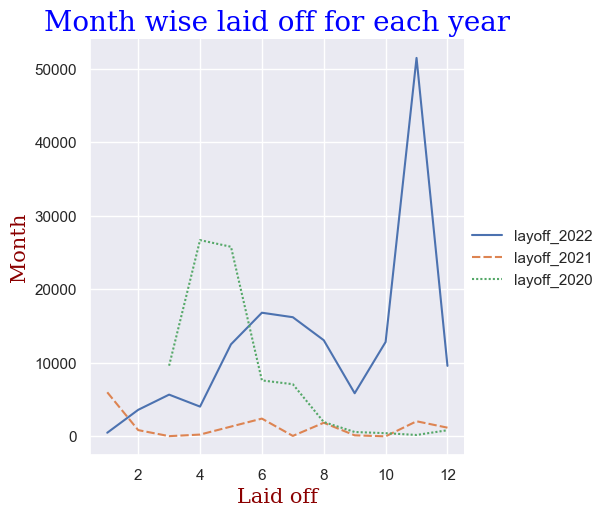

In [71]:
sns.relplot(data=year,kind="line")
plt.title("Month wise laid off for each year", fontdict = font1)
plt.xlabel("Laid off", fontdict = font2)
plt.ylabel("Month", fontdict = font2)

In November month of 2022 , maximum ( 51489 ) layoffs has done by companies.

In [72]:
comp1=layoffs_data.groupby("Company").agg({'Percentage':'mean','Laid_Off_Count':'sum'})
comp1.sort_values(by='Laid_Off_Count',ascending=False)

,Percentage,Laid_Off_Count
Company,,
Meta,0.1300,11000
Amazon,0.0300,10000
Uber,0.1875,7585
Booking.com,0.2500,4601
Cisco,0.0500,4100
...,...,...
Synergysuite,0.0700,5
Flytedesk,0.2000,4
TutorMundi,1.0000,4


Text(53.594843749999995, 0.5, 'Percentage')

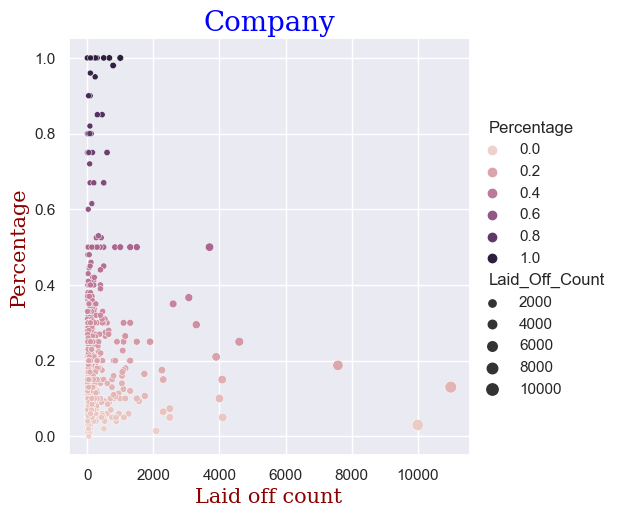

In [73]:
sns.relplot(data=comp1, x="Laid_Off_Count", y="Percentage",hue='Percentage',size='Laid_Off_Count')
plt.title("Company", fontdict = font1)
plt.xlabel("Laid off count", fontdict = font2)
plt.ylabel("Percentage", fontdict = font2)

Above chart tells that only three comapny fired more than 5000 employees even then percentage of firing of these companies are low . It means these three company are big company ( meta , amazon, uber )

In [74]:
cont=layoffs_data.groupby("Country").agg({'Percentage':'mean','Laid_Off_Count':'sum'})
cont.sort_values(by='Laid_Off_Count',ascending=False)

,Percentage,Laid_Off_Count
Country,,
United States,0.234481,163654
India,0.260862,31236
Brazil,0.211190,8110
Singapore,0.319474,5866
Canada,0.227857,5262
Netherlands,0.186667,5220
China,0.195000,4430
Germany,0.264844,4375
United Kingdom,0.262000,4170


Text(53.594843749999995, 0.5, 'Percentage')

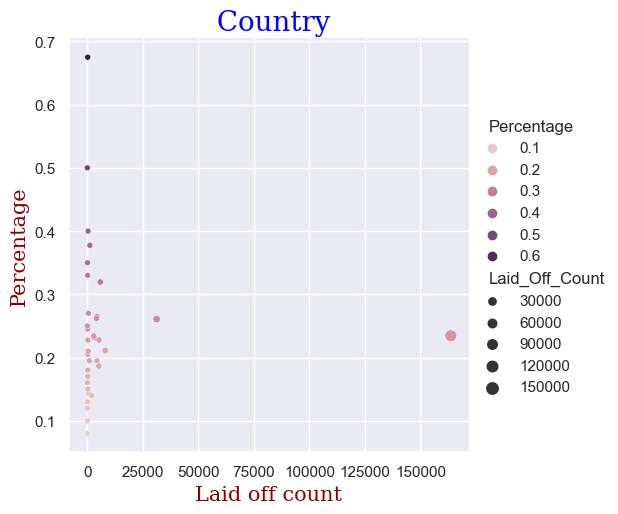

In [75]:
sns.relplot(data=cont, x="Laid_Off_Count", y="Percentage",hue='Percentage',size='Laid_Off_Count')
plt.title(" Country", fontdict = font1)
plt.xlabel("Laid off count", fontdict = font2)
plt.ylabel("Percentage", fontdict = font2)

Above chart shows that one country in which more than 150000 layoffs has done and that country is United States.

In [76]:
ind1=layoffs_data.groupby("Industry").agg({'Percentage':'mean','Laid_Off_Count':'sum'})
ind1.sort_values(by='Laid_Off_Count',ascending=False)

,Percentage,Laid_Off_Count
Industry,,
Consumer,0.257174,29449
Transportation,0.209606,29247
Retail,0.246500,28074
Finance,0.199228,21273
Food,0.322636,20090
Real Estate,0.281400,16414
Travel,0.300323,15476
Healthcare,0.265606,12243
Education,0.308974,11286


Text(53.594843749999995, 0.5, 'Percentage')

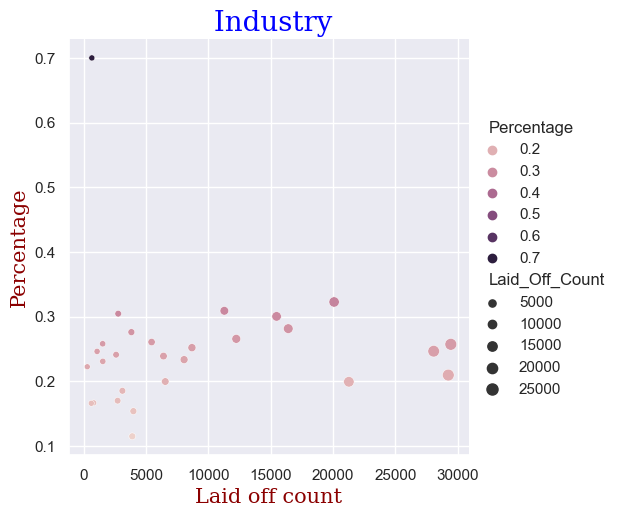

In [77]:
sns.relplot(data=ind1, x="Laid_Off_Count", y="Percentage",hue='Percentage',size='Laid_Off_Count')
plt.title(" Industry", fontdict = font1)
plt.xlabel("Laid off count", fontdict = font2)
plt.ylabel("Percentage", fontdict = font2)

Above chart shows that in all industries less than 35% layoffs has done.

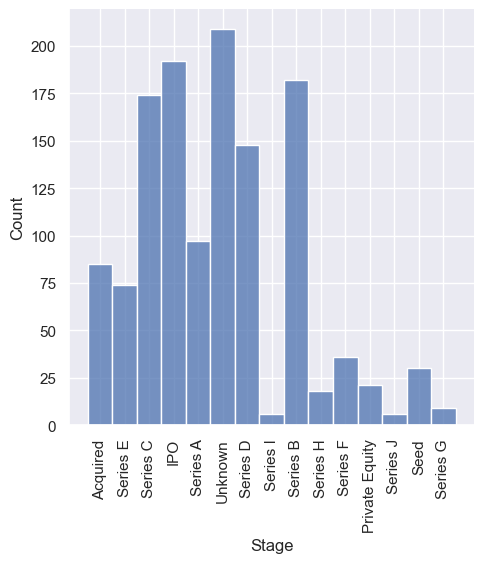

In [78]:
sns.displot(data=layoffs_data,x='Stage')
plt.xticks(rotation='vertical')
plt.show()

Above charts shows Stage wise layoffs distribution. How many times in each stage layoffs has done.

# Conclusion 

1). This Analysis clearly tells that in United States, there is maximum number of employees fired.

2). In United States, maximum times layoff has done.

3). Three company Meta, Amazon and Uber fired large number of employees.

4). Uber and Loft has done maximum 5 times layoff.

5). In Consumer industry, maximum layoff has done but in Finance industry maximum times layoff has done.

6). In 2022 maximum number of employees fired.

7). In November month of 2022 maximum employees fired by the companies.